# Predicción de Cancelación de Clientes en Model Fitness

## Un enfoque basado en aprendizaje automático y segmentación de usuarios para reducir la pérdida de clientes

---

**Autor:** Daniel Ramírez Martínez  
**Rol:** Analista de Datos  
**Fecha:** 23 de julio de 2025

---


## 1. Introducción

Model Fitness desea reducir la pérdida de clientes (churn). En este proyecto analizaremos el comportamiento de sus usuarios para:
- Predecir qué clientes probablemente se darán de baja.
- Encontrar patrones de comportamiento.
- Proponer acciones para mejorar la retención de clientes.

Trabajaremos con un conjunto de datos que contiene información demográfica, de contrato y de uso del gimnasio. Usaremos técnicas de análisis exploratorio, modelado predictivo y segmentación de usuarios (clustering).

Importación de Librerías y Carga de Datos

## 2. Importación de librerias y Carga de Datos

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Para modelado y clustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar datos
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## 3. Análisis Exploratorio de Datos (EDA)


### a) Información General 

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### b) Datos Faltantes

In [3]:
df.isnull().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

###  c) Estadísticas por grupo (churn = 1 vs churn = 0)

In [4]:
df.groupby('Churn').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### d) Distribuciones por variable

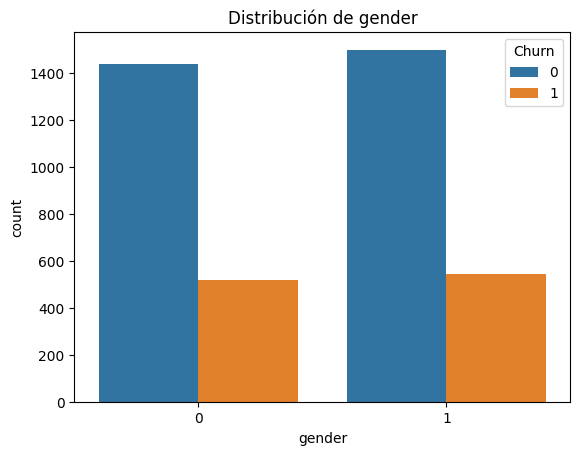

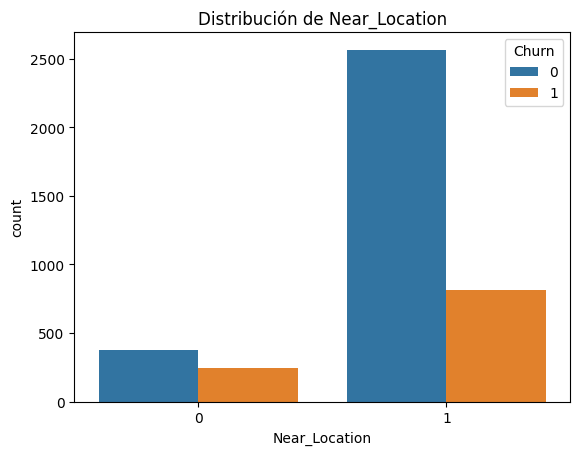

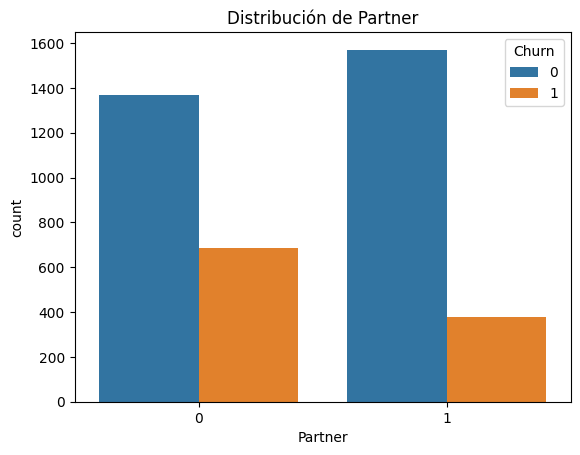

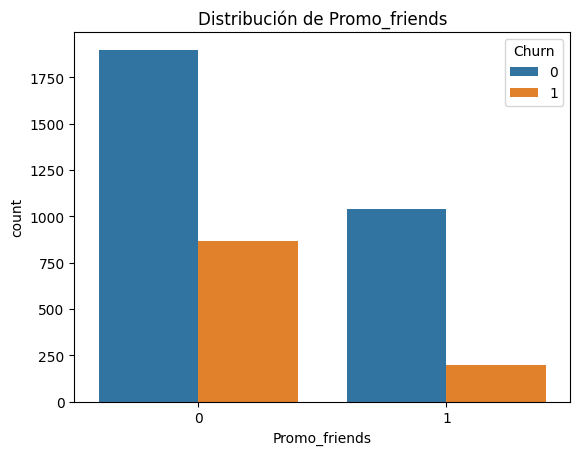

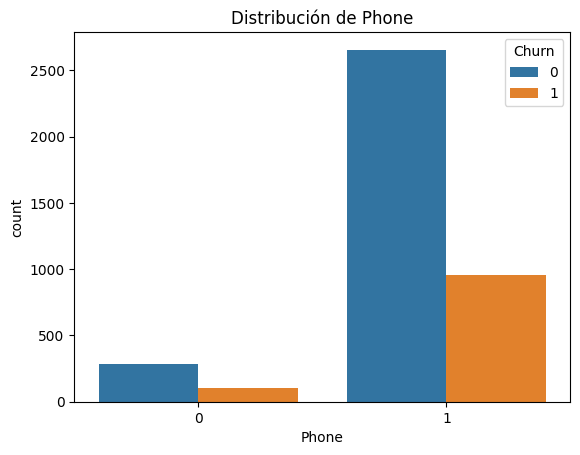

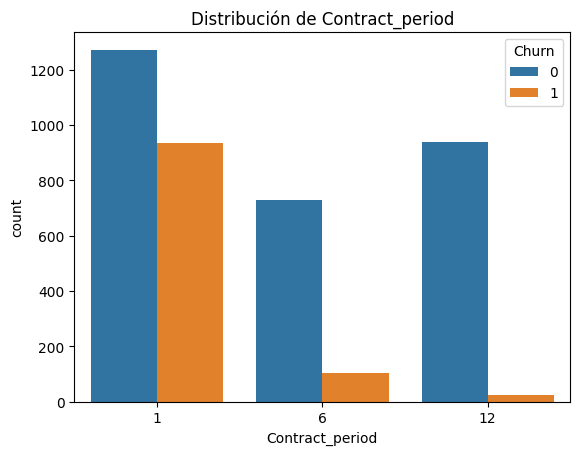

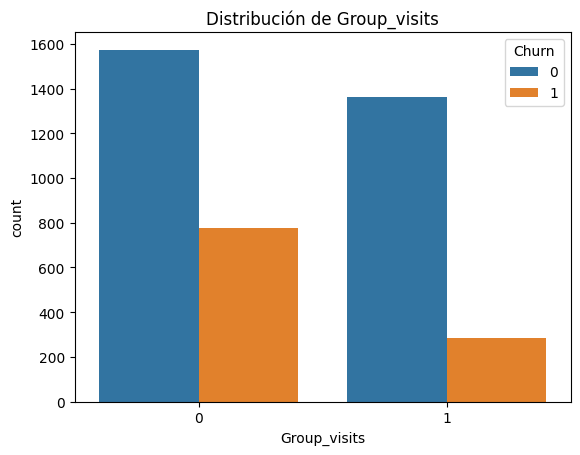

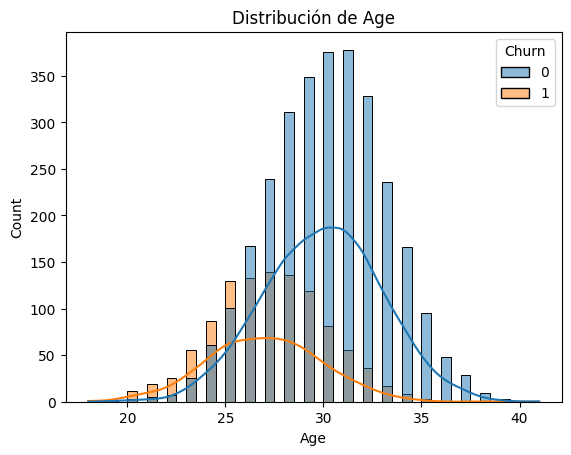

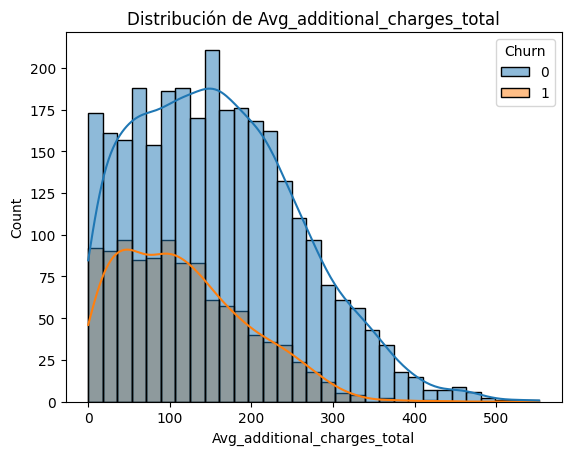

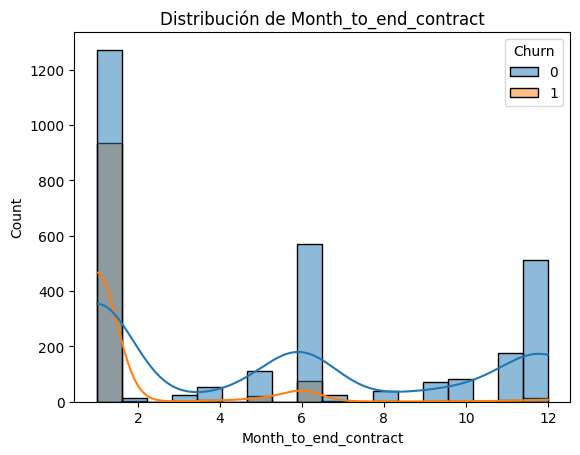

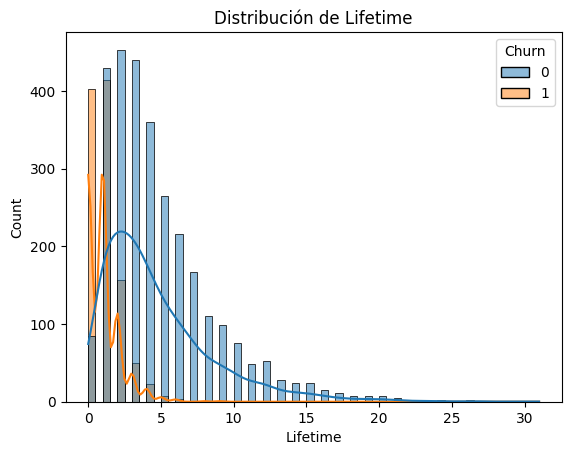

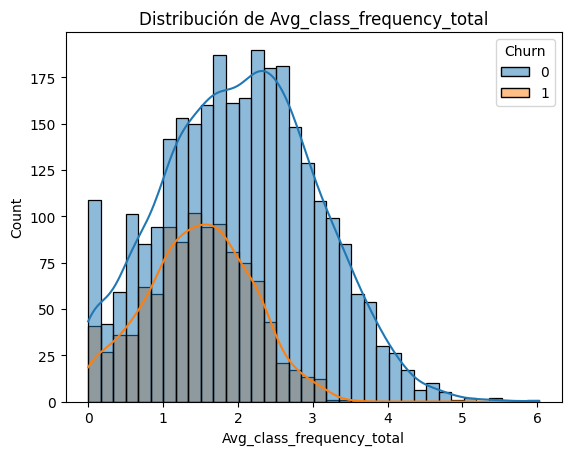

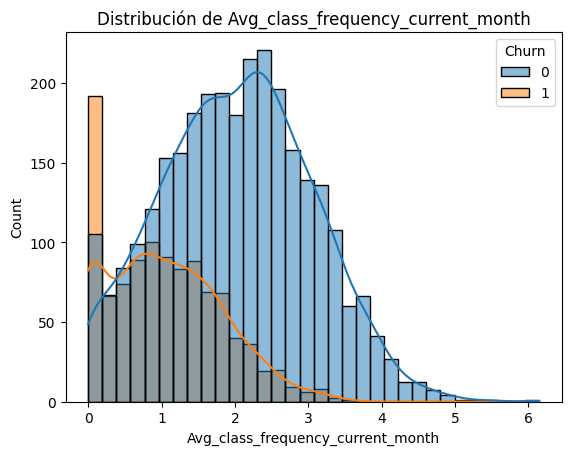

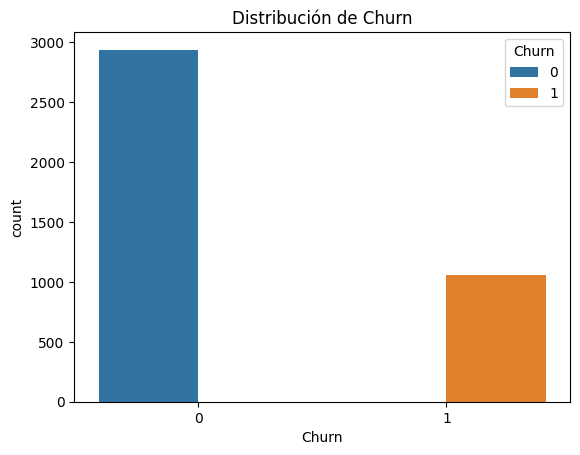

In [5]:
for column in df.columns:
    if df[column].nunique() < 10:
        sns.countplot(data=df, x=column, hue='Churn')
        plt.title(f'Distribución de {column}')
        plt.show()
    else:
        sns.histplot(data=df, x=column, hue='Churn', kde=True)
        plt.title(f'Distribución de {column}')
        plt.show()


### e) Matriz de Correlación

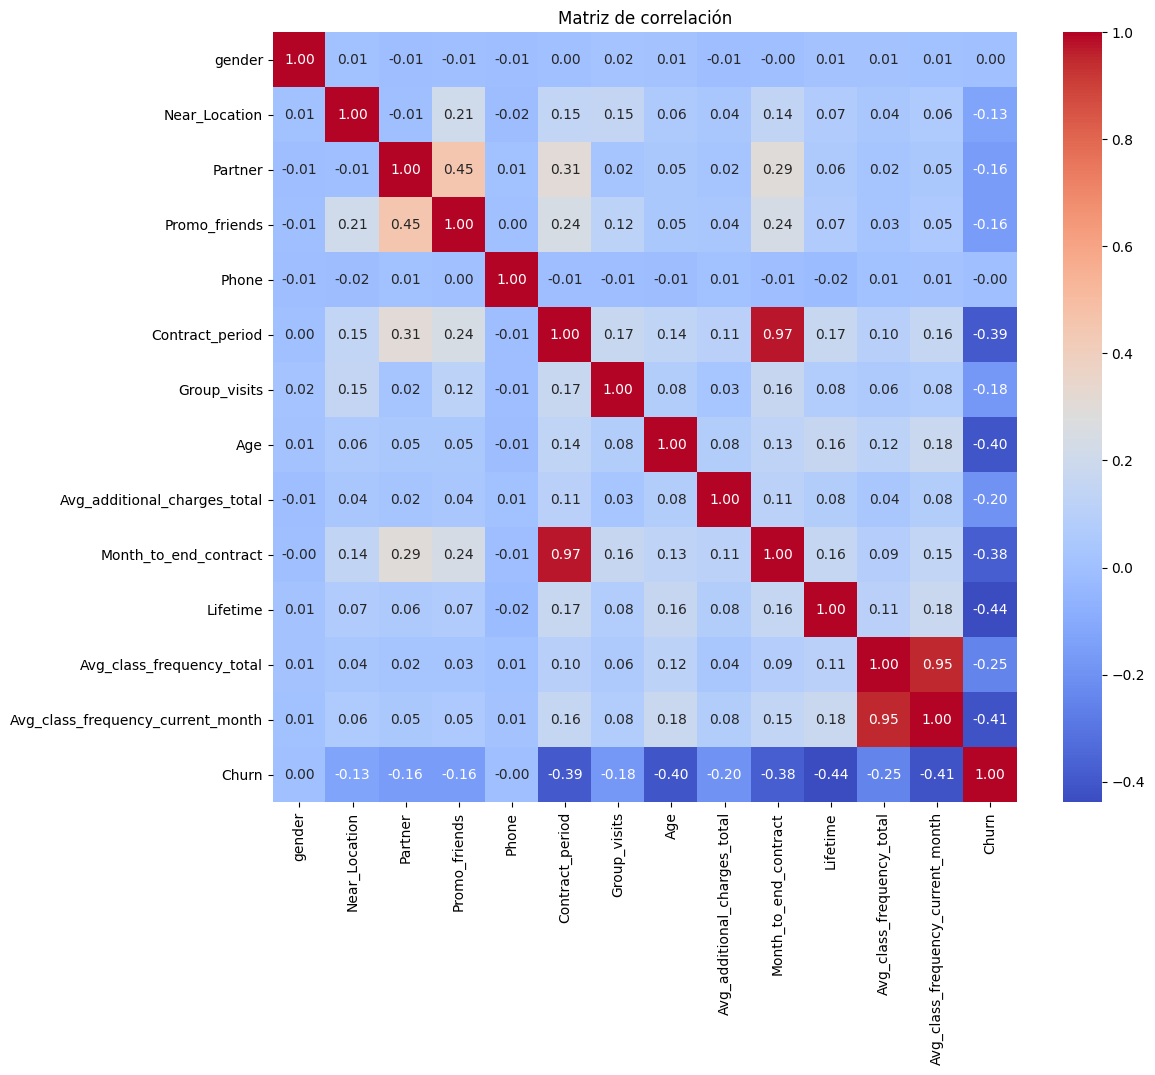

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


## 4. Modelado Predictivo (Churn)

### a) Preparación de datos

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convertir variables categóricas (si las hay)
X = pd.get_dummies(X, drop_first=True)

# Separar entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


### b) Regresión logística

In [8]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_valid)

print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_valid, y_pred_log))
print("Precision:", precision_score(y_valid, y_pred_log))
print("Recall:", recall_score(y_valid, y_pred_log))


Regresión Logística:
Accuracy: 0.91625
Precision: 0.8729281767955801
Recall: 0.7821782178217822


### c) Bosque aleatorio (Random Forest)

In [9]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_valid)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_valid, y_pred_rf))
print("Precision:", precision_score(y_valid, y_pred_rf))
print("Recall:", recall_score(y_valid, y_pred_rf))


Random Forest:
Accuracy: 0.91
Precision: 0.8494623655913979
Recall: 0.7821782178217822


### d) Comparación de modelos



Se entrenaron dos modelos de clasificación binaria para predecir si un cliente abandonará el gimnasio: regresión logística y bosque aleatorio (Random Forest). A continuación se muestran los resultados:

| Métrica     | Regresión Logística | Bosque Aleatorio |
|-------------|----------------------|------------------|
| Accuracy    | 0.916                | 0.91             |
| Precision   | 0.873                | 0.849            |
| Recall      | 0.782                | 0.782            |

- **Precisión (Precision):** La regresión logística tiene una mejor precisión. Esto significa que cuando predice que un cliente abandonará, es más probable que tenga razón. Esto es útil si queremos tomar acciones solo cuando estemos bastante seguros.

- **Sensibilidad (Recall):** Ambos modelos tienen el mismo recall. Esto significa que los dos identifican a los clientes que realmente abandonan con la misma efectividad.

- **Exactitud (Accuracy):** La regresión logística también tiene una ligera ventaja en la exactitud general.



### Conclusión

Ambos modelos presentan un rendimiento muy similar, pero la **regresión logística se desempeña ligeramente mejor en precisión y exactitud**, por lo que puede ser la mejor opción en este caso.

Además, la regresión logística es más fácil de interpretar y analizar, lo que puede ser útil para generar estrategias basadas en los factores que más influyen en la cancelación.

Se recomienda usar **regresión logística** para este caso, ya que ofrece un balance adecuado entre rendimiento y facilidad de interpretación.

**Nota:**

Si el gimnasio quiere detectar a todos los clientes que podrían irse, lo más importante sería un recall alto.

Pero si el gimnasio quiere evitar falsas alarmas (por ejemplo, contactar a un cliente que en realidad no iba a cancelar), entonces la precisión es más importante.


## 5. Segmentación de Clientes (Clustering)

### a) Estandarización de datos



In [10]:
X_clust = df.drop('Churn', axis=1)
X_clust = pd.get_dummies(X_clust, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)


### b) Dendrograma

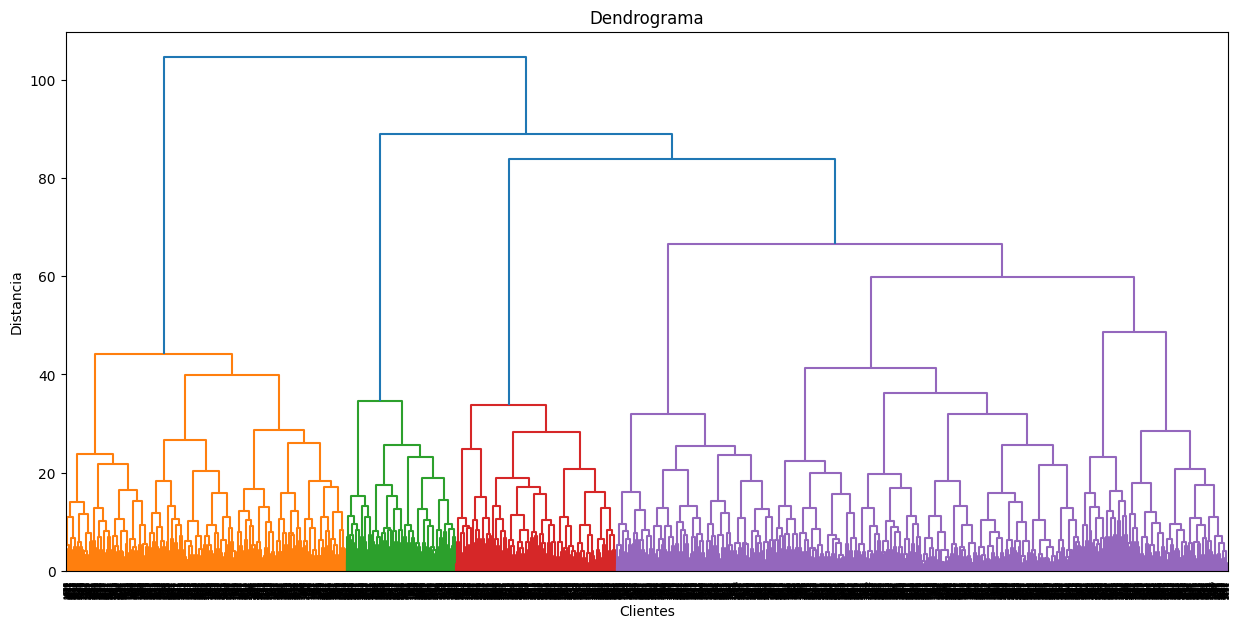

In [11]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()


### c) Modelo K-means

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


### d) Análisis de clústeres

In [13]:
df.groupby('cluster').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


### e) Distribuciones por clúster

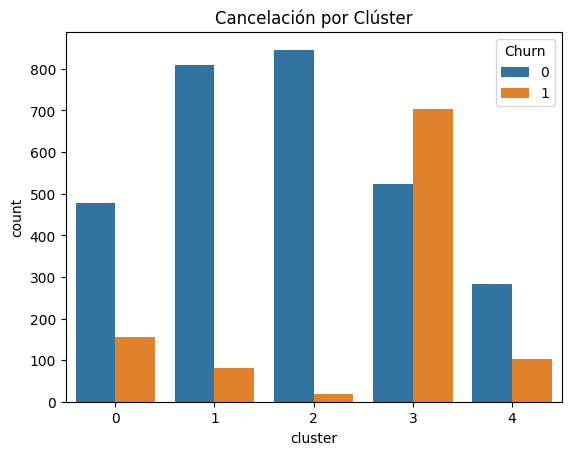

In [14]:
sns.countplot(data=df, x='cluster', hue='Churn')
plt.title('Cancelación por Clúster')
plt.show()


#### Interpretacion 

Se identificaron cinco grupos de clientes con características promedio distintas. El clúster 3 presenta la tasa de cancelación (churn) más alta (57%), lo cual se asocia con contratos más cortos, menor frecuencia de asistencia y baja participación en promociones o visitas en grupo. En contraste, el clúster 2 muestra el churn más bajo (2%), asociado a contratos largos, mayor tiempo de relación con el gimnasio, y mayor participación grupal.
Estos resultados sugieren que la duración del contrato, la frecuencia de asistencia y el nivel de interacción social son factores clave para la retención de clientes.

## 6. Conclusiones y Recomendaciones

1. Focalizar esfuerzos en el clúster 3
Implementar acciones específicas para este grupo, como:

- Promociones personalizadas para extender la duración del contrato.

- Incentivos para invitar amigos o asistir en grupo.

- Actividades que fomenten la integración social.

2. Reforzar programas exitosos del clúster 2

- Identificar qué prácticas están funcionando (e.g., programas de lealtad o beneficios por permanencia) y replicarlas en otros grupos.

3. Monitorear a los clientes con menor frecuencia de asistencia actual

- Clientes con baja actividad en el mes actual (sin importar su historial) podrían estar en riesgo de abandono. Enviar alertas o recordatorios personalizados puede reducir el churn.

4. Integrar los modelos predictivos al sistema de gestión

- Automatizar la detección de clientes en riesgo con el modelo de regresión logística o random forest.

- Activar campañas de retención de manera anticipada con base en las predicciones.

5. Diseñar programas de fidelización adaptados a cada perfil

- Usar los clústeres como base para segmentar campañas de marketing, ajustando el mensaje y las ofertas según el comportamiento y características del grupo.